In [1]:
import numpy as np
import pandas as pd
import torch
from preprocess1127 import get_X, get_y, g_testX
from torch.autograd import Variable
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv("./data/train_df.csv", index_col=0)
validation = pd.read_csv("./data/validation_df.csv", index_col=0)
test = pd.read_csv("./data/test_df.csv", index_col=0)

In [7]:
train.head()

,BLDS,SEX,AGE_GROUP,WEIGHT,WAIST,BP_HIGH,BP_LWST,HMG,OLIG_PROTE_CD,SGPT_ALT,GAMMA_GTP,SMK_STAT_TYPE_CD
0,107.0,2,11,55,68.0,150.0,80.0,13.0,1.0,35.0,39.0,3.0
1,116.0,2,13,65,87.0,116.0,75.0,14.0,1.0,15.0,50.0,1.0
2,98.0,2,10,45,66.0,105.0,66.0,14.0,1.0,15.0,18.0,1.0
3,95.0,2,13,60,89.0,128.0,85.0,12.0,1.0,15.0,19.0,1.0
4,85.0,1,16,50,81.0,130.0,92.0,15.0,1.0,32.0,29.0,1.0


In [6]:
print(list(train.columns)[1:])


['SEX', 'AGE_GROUP', 'WEIGHT', 'WAIST', 'BP_HIGH', 'BP_LWST', 'HMG', 'OLIG_PROTE_CD', 'SGPT_ALT', 'GAMMA_GTP', 'SMK_STAT_TYPE_CD']


In [8]:
X_train = get_X(train)
y_train = get_y(train)
X_validation = get_X(validation)
y_validation = get_y(validation)
X_test = g_testX(test)
X_train

tensor([[ 2., 11., 55.,  ..., 35., 39.,  3.],
        [ 2., 13., 65.,  ..., 15., 50.,  1.],
        [ 2., 10., 45.,  ..., 15., 18.,  1.],
        ...,
        [ 1., 15., 60.,  ..., 29., 16.,  3.],
        [ 2.,  9., 55.,  ..., 10., 15.,  1.],
        [ 1., 11., 70.,  ...,  7., 36.,  3.]])

In [160]:
from nnH import linearRegression

In [161]:
inputDim = X_train.shape[1]        
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 500

model = linearRegression(inputDim, outputDim)

In [162]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
#optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)
#optimizer = torch.optim.Adadelta(model.parameters(), lr=learningRate)

In [163]:
k=5
i=1
kf=KFold(n_splits=k,shuffle=True,random_state=42)
train_loss_epochs = []
val_loss_epochs = []
for epoch in range(epochs):
    train_loss = []
    val_loss = []
    for train_index, test_index in kf.split(X_train,y_train):
        model.train()
        inputs = Variable(X_train[train_index]) # 입력벡터
        labels = Variable(y_train[train_index])
        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
        optimizer.zero_grad()
        outputs = model(inputs)
        # get loss for the predicted output
        loss = criterion(outputs, labels)
        # get gradients w.r.t to parameters
        loss.backward()
        # update parameters
        optimizer.step()
        train_loss.append(loss.item())

        model.eval()
        with torch.no_grad():
          inputs_val = Variable(X_train[test_index])
          labels_val = Variable(y_train[test_index])
          outputs_val = model(inputs_val)
          loss_val = criterion(outputs_val, labels_val)
          val_loss.append(loss_val.item())
    print(f"{i} ephoces validation loss = {sum(val_loss)/len(val_loss)}")
    i+=1
    train_loss_epochs.append(sum(train_loss)/len(train_loss))
    val_loss_epochs.append(sum(val_loss)/len(val_loss))

1 ephoces validation loss = 127.59468078613281
2 ephoces validation loss = 104.06426544189453
3 ephoces validation loss = 84.94858856201172
4 ephoces validation loss = 69.37908020019532
5 ephoces validation loss = 56.68619613647461
6 ephoces validation loss = 46.33335876464844
7 ephoces validation loss = 37.88598861694336
8 ephoces validation loss = 30.991007614135743
9 ephoces validation loss = 25.36124496459961
10 ephoces validation loss = 20.76302261352539
11 ephoces validation loss = 17.006109619140624
12 ephoces validation loss = 13.935558891296386
13 ephoces validation loss = 11.425143432617187
14 ephoces validation loss = 9.372006797790528
15 ephoces validation loss = 7.6922807693481445
16 ephoces validation loss = 6.31756067276001
17 ephoces validation loss = 5.1920675277709964
18 ephoces validation loss = 4.270278644561768
19 ephoces validation loss = 3.515042781829834
20 ephoces validation loss = 2.8960206508636475
21 ephoces validation loss = 2.3884323596954347
22 ephoces va

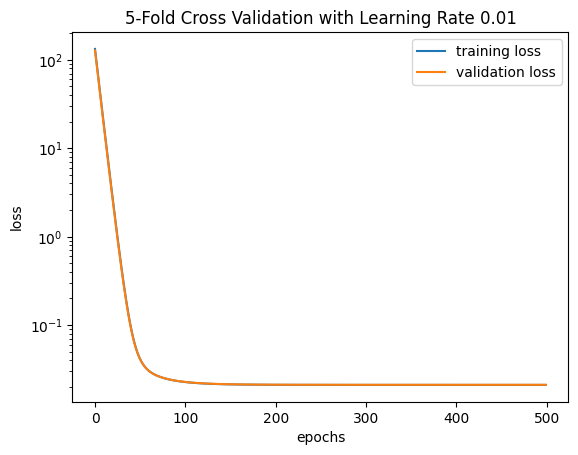

In [164]:
plt.figure()
plt.plot(range(epochs), train_loss_epochs, label="training loss")
plt.plot(range(epochs), val_loss_epochs, label="validation loss")
plt.legend(loc="best")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale("log")
plt.title(str(k)+"-Fold Cross Validation with Learning Rate "+str(learningRate))
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#n_estimators=list(range(100,1100,100))
learn_rate=[0.001,0.005,0.01,0.05,0.1]
"""hyper={'learning_rate':learn_rate}
gd=GridSearchCV(estimator=model,param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)"""

In [168]:
learn_rate=[0.001,0.005,0.01,0.05,0.1]
k=5
for lr in learn_rate:
    #optimizer = torch.optim.Adadelta(model.parameters(), lr=lr)
    kf=KFold(n_splits=k,shuffle=True,random_state=42)
    train_loss_epochs = []
    val_loss_epochs = []
    for epoch in range(epochs):
        train_loss = []
        val_loss = []
        vvv = []
        for train_index, test_index in kf.split(X_train,y_train):
            model.train()
            inputs = Variable(X_train[train_index]) # 입력벡터
            labels = Variable(y_train[train_index])
            # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
            optimizer.zero_grad()
            
            outputs = model(inputs)
            # get loss for the predicted output
            loss = criterion(outputs, labels)
            # get gradients w.r.t to parameters
            loss.backward()
            # update parameters
            optimizer.step()
            train_loss.append(loss.item())

            model.eval()
            with torch.no_grad():
                inputs_val = Variable(X_train[test_index])
                labels_val = Variable(y_train[test_index])
                outputs_val = model(inputs_val)
                loss_val = criterion(outputs_val, labels_val)
                val_loss.append(loss_val.item())
        train_loss_epochs.append(sum(train_loss)/len(train_loss))
        val_loss_epochs.append(sum(val_loss)/len(val_loss))
    print(f"{lr} \t -> validation loss = \t {sum(val_loss)/len(val_loss)}")
    vvv.append(sum(val_loss)/len(val_loss))

0.001 	 -> validation loss = 	 0.021080694161355495
0.005 	 -> validation loss = 	 0.021080694161355495
0.01 	 -> validation loss = 	 0.021080694161355495
0.05 	 -> validation loss = 	 0.021080694161355495
0.1 	 -> validation loss = 	 0.021080694161355495


In [115]:
optimizers=[torch.optim.SGD(model.parameters(), lr=lr), torch.optim.Adam(model.parameters(), lr=lr), torch.optim.Adamax(model.parameters(), lr=lr), torch.optim.Adadelta(model.parameters(), lr=lr)]
k=5
names=["SGD","Adam","Adamax","Adadelta"]
i=0
for opt in optimizers:
    optimizer = opt
    kf=KFold(n_splits=k,shuffle=True,random_state=42)
    train_loss_epochs = []
    val_loss_epochs = []
    for epoch in range(epochs):
        train_loss = []
        val_loss = []
        for train_index, test_index in kf.split(X_train,y_train):
            model.train()
            inputs = Variable(X_train[train_index])
            labels = Variable(y_train[train_index])
            # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
            optimizer.zero_grad()
            # get output from the model, given the inputs
            outputs = model(inputs)
            # get loss for the predicted output
            loss = criterion(outputs, labels)
            # get gradients w.r.t to parameters
            loss.backward()
            # update parameters
            optimizer.step()
            train_loss.append(loss.item())

            model.eval()
            with torch.no_grad():
                inputs_val = Variable(X_train[test_index])
                labels_val = Variable(y_train[test_index])
                outputs_val = model(inputs_val)
                loss_val = criterion(outputs_val, labels_val)
                val_loss.append(loss_val.item())
        train_loss_epochs.append(sum(train_loss)/len(train_loss))
        val_loss_epochs.append(sum(val_loss)/len(val_loss))
    print(f"{names[i]} \t -> val loss = \t {sum(val_loss)/len(val_loss)}")
    i+=1

SGD 	 -> val loss = 	 0.022595707327127457
Adam 	 -> val loss = 	 0.027162013947963713
Adamax 	 -> val loss = 	 0.03013625256717205
Adadelta 	 -> val loss = 	 0.021148920617997648


In [116]:
with torch.no_grad():
    prediction = model(Variable(X_test))
prediction

tensor([[11.6793],
        [11.8411],
        [12.0275],
        ...,
        [12.0927],
        [11.6433],
        [12.3862]])

In [92]:
predicted_saleprice = torch.exp(prediction)
submission = pd.DataFrame({'Id':test['Id'],
                           'SalePrice':predicted_saleprice.detach().numpy().reshape(-1)})
submission

,Id,SalePrice
0,1461,118132.890625
1,1462,138714.453125
2,1463,167390.187500
3,1464,195226.984375
4,1465,181743.140625
...,...,...
1454,2915,95571.906250
1455,2916,95598.890625
1456,2917,178569.031250
1457,2918,113803.015625


In [93]:
submission.to_csv('submission.csv', index=False)

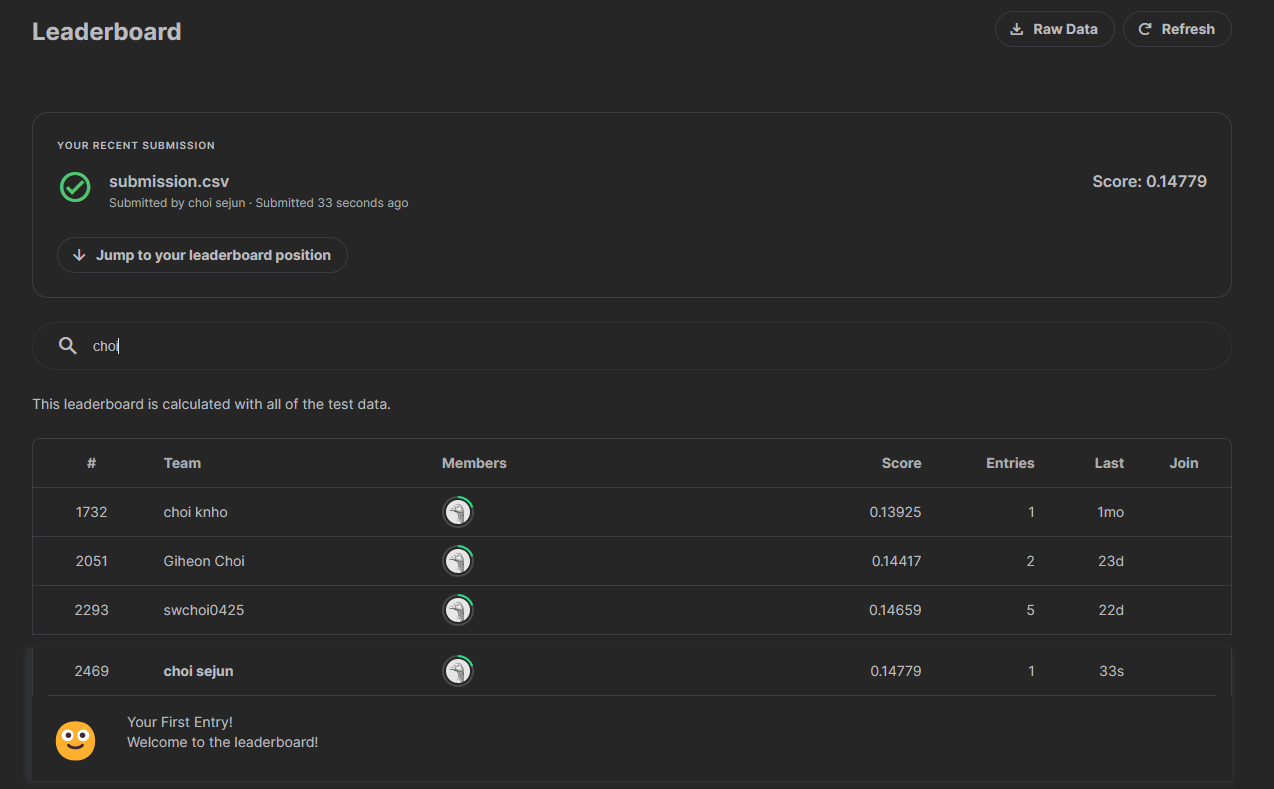